In [37]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [38]:
df = pd.read_csv('007 cost-revenue-dirty.csv')
df.head()

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [39]:
result = [(col, df[col].isin([None, '$0','', ' ', 0]).sum()) for col in df.columns ]
result

[('Rank', 0),
 ('Release Date', 0),
 ('Movie Title', 0),
 ('Production Budget ($)', 0),
 ('Worldwide Gross ($)', 357),
 ('Domestic Gross ($)', 512)]

In [40]:
df.columns = df.columns.str.replace('($)', '').str.strip()
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [41]:
mask = ['production_budget', 'worldwide_gross']
df = df[mask]
df['production_budget'] = df['production_budget'].str.replace(',', '').str.replace('$', '').astype(float)
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)
df.describe()

,production_budget,worldwide_gross
count,5.391000e+03,5.391000e+03
mean,3.111374e+07,8.885542e+07
std,4.052380e+07,1.684578e+08
min,1.100000e+03,0.000000e+00
25%,5.000000e+06,3.865206e+06
50%,1.700000e+07,2.745045e+07
75%,4.000000e+07,9.645446e+07
max,4.250000e+08,2.783919e+09


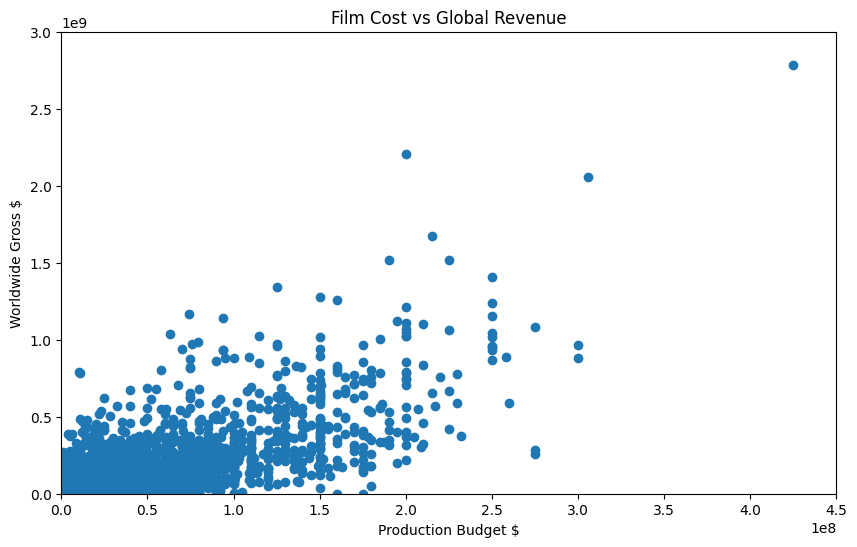

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(df['production_budget'], df['worldwide_gross'])
plt.title('Film Cost vs Global Revenue')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
plt.show()

In [46]:
X = df[['production_budget']]
y = df[['worldwide_gross']]
regression = LinearRegression()
regression.fit(X, y)

LinearRegression()

In [47]:
regression.coef_

array([[3.11150918]])

In [48]:
regression.intercept_

array([-7236192.72913943])

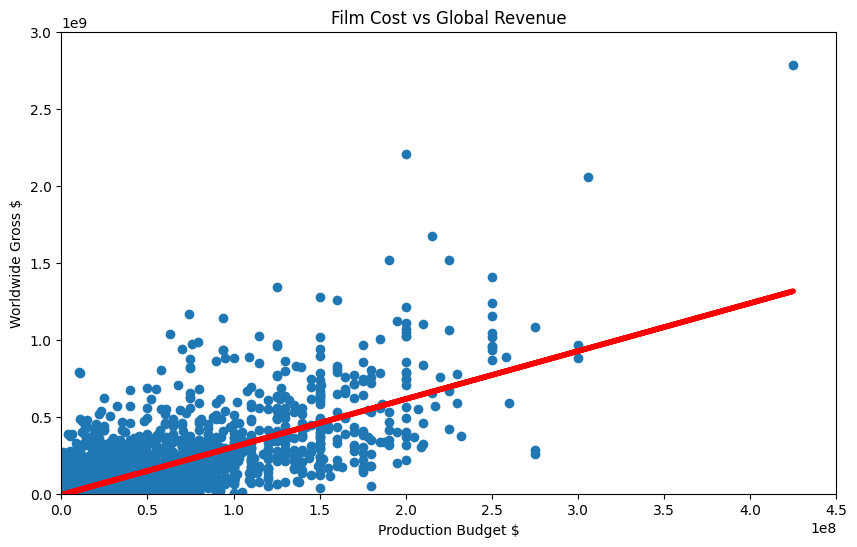

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(df['production_budget'], df['worldwide_gross'])
plt.plot(X, regression.predict(X), color='red', linewidth=4)
plt.title('Film Cost vs Global Revenue')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
plt.show()

In [50]:
regression.score(X, y)

0.5496485356985727